In [39]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest

In [40]:
data1 = pd.read_excel('C:/Personal/09142640/Downloads/Crimes_new_york_by_city_2013.xls', sheet_name=0, header=4)
data=data1.fillna(0)

In [41]:
data = data.drop(data[data.Population > 15000].index)

In [42]:
data['Sq_population']=data['Population']*data['Population']
data['Burglary_Flag']=np.where((data['Burglary']>0),1,0)
data['Robbery_Flag']=np.where((data['Robbery']>0),1,0)
data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3,Sq_population,Burglary_Flag,Robbery_Flag
0,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000,3463321.000,1,0
1,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000,6640929.000,1,0
2,Akron Village,2846.000,3.000,0.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000,8099716.000,1,0
4,Albion Village,6388.000,23.000,0.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,0.000,40806544.000,1,1
5,Alfred Village,4089.000,5.000,0.000,0.000,0.000,3.000,2.000,46.000,10.000,36.000,0.000,0.000,16719921.000,1,1


In [43]:
regr = linear_model.LinearRegression()

#features=data[['Population','Sq_population','Burglary_flag','Property_Flag']]
Y = data[['Property crime']]
X = data[['Population','Sq_population','Burglary_Flag','Robbery_Flag']]

regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-5.66575271e-03  1.61750577e-06  2.38010959e+01  8.96219873e+01]]

Intercept: 
 [6.0399753]

R-squared:
0.5370586086463884


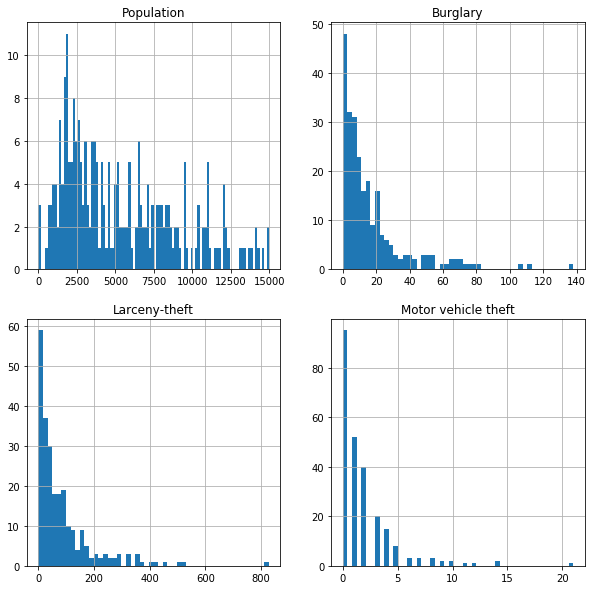

In [45]:
plt.figure(figsize=(10,10))
plt.subplot(221)
data['Population'].hist(bins=100)
plt.title('Population')

plt.subplot(222)
data['Burglary'].hist(bins=50)
plt.title('Burglary')

plt.subplot(223)
data['Larceny-theft'].hist(bins=50)
plt.title('Larceny-theft')

plt.subplot(224)
data['Motor vehicle theft'].hist(bins=50)
plt.title('Motor vehicle theft')


plt.show()

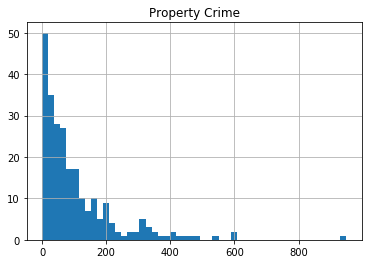

In [46]:
data['Property crime'].hist(bins=50)
plt.title('Property Crime')
plt.show()

# Assumption one: linear relationship

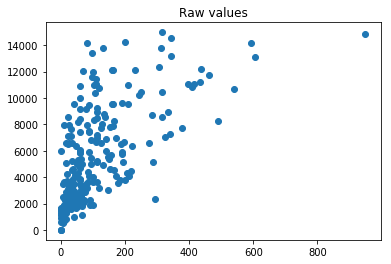

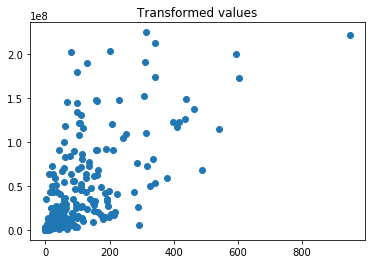

In [47]:
data['Sq_population']=data['Population']*data['Population']
plt.scatter(data['Property crime'], data['Population'])
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
#sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(data['Property crime'], data['Sq_population'])
plt.title('Transformed values')
plt.show()

# Assumption two: multivariate normality


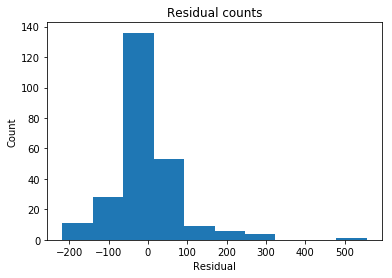

In [48]:
predicted = regr.predict(X).ravel()
actual = data['Property crime']
#actual = actual[~np.isnan(actual)]
#predicted = predicted[~np.isnan(predicted)]
# Calculate the error, also called the residual.
residual = actual-predicted 
plt.hist(residual)
#plt.hist(data[np.isfinite(df['distance'])].values)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


# Assumption three: homoscedasticity

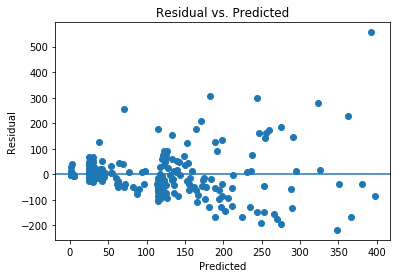

In [12]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [49]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Sq_population,Burglary_Flag,Robbery_Flag
Population,1.000,0.964,0.350,0.457
Sq_population,0.964,1.000,0.246,0.399
Burglary_Flag,0.350,0.246,1.000,0.267
Robbery_Flag,0.457,0.399,0.267,1.000


# We will use PCA to check for the optimimum number of components


# PCA:

In [50]:
features_pca = data.loc[:, ['Population','Sq_population','Burglary_Flag','Robbery_Flag']].dropna()

In [51]:
# The NumPy covariance function assumes that variables are reprensented by rows, not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)


Covariance Matrix:
 [[1.37334386e+07 1.84596887e+11 3.83737234e+02 8.43029058e+02]
 [1.84596887e+11 2.67228614e+15 3.76531761e+06 1.02710228e+07]
 [3.83737234e+02 3.76531761e+06 8.77628314e-02 3.94410343e-02]
 [8.43029058e+02 1.02710228e+07 3.94410343e-02 2.48253232e-01]]


In [52]:
X = StandardScaler().fit_transform(features_pca)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.60696953 0.21392915 0.17181436 0.00728695]


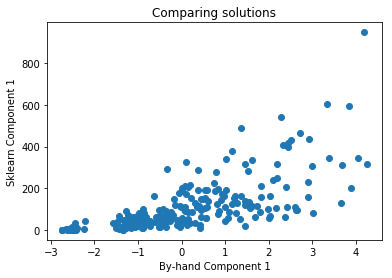

In [57]:
sklearn_pca = PCA(n_components=4)
x_sklearn = sklearn_pca.fit_transform(X)
regr.fit(x_sklearn, Y)
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)



# Compare the sklearn solution to ours – a perfect match.
plt.plot(x_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.60696953 0.21392915 0.17181436 0.00728695]


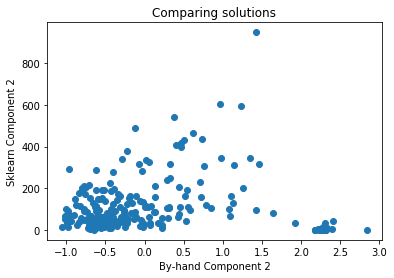

In [58]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)
regr.fit(x_sklearn, Y)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 1], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 2')
plt.xlabel('By-hand Component 2')
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.60696953 0.21392915 0.17181436 0.00728695]


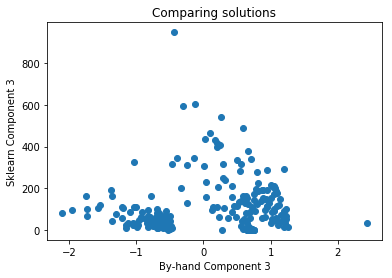

In [60]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)
regr.fit(x_sklearn, Y)
# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 2], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 3')
plt.xlabel('By-hand Component 3')
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.60696953 0.21392915 0.17181436 0.00728695]


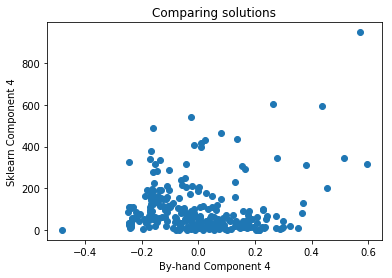

In [61]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
regr.fit(x_sklearn, Y)
plt.plot(Y_sklearn[:, 3], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 4')
plt.xlabel('By-hand Component 4')
plt.show()

It seems component 1 is closely related to outcome variable so we keep component 1

As per the plot above,we should keep only the first component

In [35]:
# Instantiate our model.# Instan 
regr = linear_model.LinearRegression()
Y = data['Property crime'].dropna()
X = data[['Population', 'Sq_population']].dropna()

# Fit our model to our data.
regr.fit(X, Y)

# Display the attributes we calculated.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: \n')
print(regr.score(X, Y))


Coefficients: 
 [9.51994147e-03 9.46505876e-07]

Intercept: 
 15.0186927404919

R-squared: 

0.4365463488284994


Using the variables as above that we used in PCA, R-square is 43%.That means that with the two features population, sq_population there was 43% variance in property crime